In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Waste_Classification/Dataset_Resized',
                                                 shuffle=True,
                                                 target_size=(100, 100), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Waste_Classification/Dataset_Resized',
                                                 shuffle=True,
                                                 target_size=(100, 100), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 3500 images belonging to 9 classes.
Found 869 images belonging to 9 classes.


In [ ]:
model = Sequential([
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(9, activation= 'softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
110/110 [==============================] - 14s 117ms/step - loss: 1.8915 - accuracy: 0.2977 - val_loss: 1.7097 - val_accuracy: 0.4327
Epoch 2/10
110/110 [==============================] - 12s 111ms/step - loss: 1.4262 - accuracy: 0.4820 - val_loss: 1.4314 - val_accuracy: 0.5259
Epoch 3/10
110/110 [==============================] - 12s 107ms/step - loss: 1.1492 - accuracy: 0.5983 - val_loss: 1.3217 - val_accuracy: 0.5489
Epoch 4/10
110/110 [==============================] - 12s 107ms/step - loss: 0.9394 - accuracy: 0.6611 - val_loss: 1.3085 - val_accuracy: 0.5708
Epoch 5/10
110/110 [==============================] - 12s 107ms/step - loss: 0.7388 - accuracy: 0.7346 - val_loss: 1.2016 - val_accuracy: 0.6064
Epoch 6/10
110/110 [==============================] - 12s 107ms/step - loss: 0.6092 - accuracy: 0.7874 - val_loss: 1.2266 - val_accuracy: 0.6191
Epoch 7/10
110/110 [==============================] - 12s 107ms/step - loss: 0.4577 - accuracy: 0.8426 - val_loss: 1.3291 - val_ac

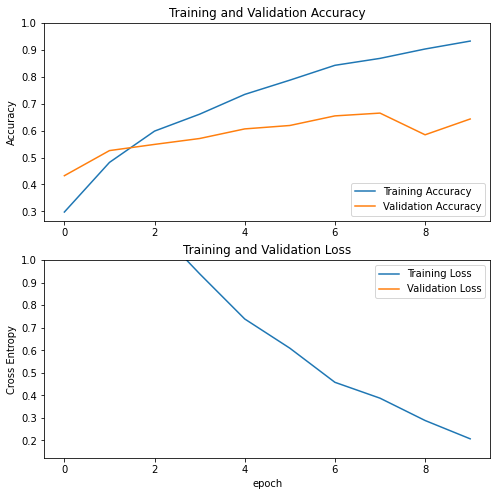

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
img_height = 100
img_width = 100

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2)
])

In [ ]:
model = Sequential([
  data_augmentation,
  resize_and_rescale,
  layers.Conv2D(16, 3, padding='same', activation='relu', strides = 2, input_shape=(100,100,3)),
  layers.MaxPooling2D(pool_size=(2,2),strides = 2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides = 2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides = 2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides = 2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides = 2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2),strides = 2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(9, activation = 'softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
history_fine = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)